#Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# install splitfolders to split dataset
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import all libraries needed
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import zipfile
import shutil
import splitfolders
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Select .json location
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Tubes ML"

In [ ]:
#command api kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:00<00:00, 164MB/s]
100% 163M/163M [00:00<00:00, 178MB/s]


In [ ]:
!unzip face-mask-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

#Preprocessing

In [ ]:
%cd /content/
%mkdir dataset

/content


In [ ]:
#splitting dataset to 3 dir with 80,10,10 -> train, val, test
data_dir = '/content/data'
output = '/content/dataset'
splitfolders.ratio(data_dir, output=output, seed=42, ratio=(.8, .1, .1)) 
# ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example

Copying files: 7553 files [00:01, 4661.94 files/s]


In [ ]:
# create train, val, test paths
train_dir = os.path.join('/content/dataset/train')
validation_dir = os.path.join('/content/dataset/val')
test_dir= os.path.join('/content/dataset/test')

In [ ]:
# gather train dataset
trainX = []
trainY = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (224,224))
            trainX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            trainY.append(label)

trainX = np.array(trainX)
trainY = np.array(trainY)

In [ ]:
# gather validation data
valX = []
valY = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (224,224))
            valX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            valY.append(label)

valX = np.array(valX)
valY = np.array(valY)

In [ ]:
# gather validation data
testX = []
testY = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (224,224))
            testX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            testY.append(label)

testX = np.array(testY)
testY = np.array(testY)

In [ ]:
# check shape of each images in train & val dataset
print("Train Data=", trainX.shape)
print("Train Label=", trainY.shape)
print("Validation Data=", valX.shape)
print("Validation Label=", valY.shape)
#print("Test Data=", testX.shape)
#print("Test Label=", testY.shape)

Train Data= (6042, 224, 224, 3)
Train Label= (6042,)
Validation Data= (754, 224, 224, 3)
Validation Label= (754,)


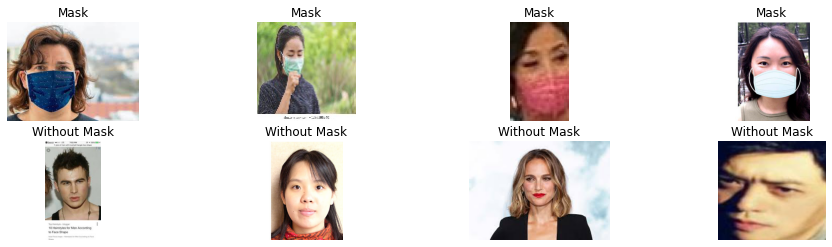

In [ ]:
%matplotlib inline


train_mask_dir = os.path.join(train_dir, 'with_mask')
train_nomask_dir = os.path.join(train_dir, 'without_mask')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 2)
pic_index += 4

next_mask_pix = [os.path.join(train_mask_dir, fname)
                        for fname in os.listdir(train_mask_dir)[pic_index-4:pic_index]]
next_nomask_pix = [os.path.join(train_nomask_dir, fname)
                       for fname in os.listdir(train_nomask_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(next_mask_pix+next_nomask_pix):
    # Set up subplot; subplot indices start at 1
    if(i < 4) :
        title = "Mask"
    else:
        title = "Without Mask"
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    plt.title(title)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [ ]:
# label encoder implementation in each train & validation label
lb = LabelEncoder()
trainY = lb.fit_transform(trainY)
valY = lb.fit_transform(valY)
testY = lb.fit_transform(testY)

In [ ]:
# check maximum & minimum scale of each images
print('Train min=%.f, max=%.f' % (trainX.min(), trainX.max()))
print('Validation min=%.f, max=%.f' % (valX.min(), valX.max()))
#print('Test min=%.f, max=%.f' % (testX.min(), testX.max()))

Train min=0, max=255
Validation min=0, max=255


#augmentation 

In [ ]:
# normalize the scale in every images using ImageDataGenerator
datagen = ImageDataGenerator( rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
# implement ImageDataGenerator in train, test data, & each label
train_iterator = datagen.flow(trainX, trainY, batch_size=32)
val_iterator = datagen.flow(valX, valY, batch_size=32)
print('Batches train=%d, validation=%d' % (len(train_iterator), len(val_iterator)))

Batches train=189, validation=24


#Model 1 DenseNet121

In [ ]:
'''
Import Library yang dibutuhkan
'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten,Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
#exponanential decay for learning rate schedule
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = LearningRateScheduler(exponential_decay_fn)

In [ ]:
#optimizer
targetdir = '/content/gdrive/MyDrive/Tubes ML/Modul5Densenet121.h5'
savedir = targetdir
callbacks = EarlyStopping(monitor='val_loss', patience=25 , verbose=1, mode='auto')        
best_model = ModelCheckpoint(savedir, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [ ]:
import tensorflow as tf

# import pretrain model in this case i use Resnet Model and setting the parameter "include_top" to false so i can change it
DenseNet121_base = tf.keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet',
                                                           input_tensor=None, input_shape=(224, 224,3))

29084464/29084464 [==============================] - 1s 0us/step


In [ ]:
'''
melakukan setting bahwa model pretrained tidak akan dilatih ulang
'''

DenseNet121_base.trainable = False

In [ ]:
print('Adding new layers')
output = DenseNet121_base.get_layer(index = -1).output  
output = Flatten()(output)
output = Dense(64,activation = "relu")(output)
output = Dense(128,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(1, activation='sigmoid')(output) 
print('New layers Finishing Added!!!!')

Adding new layers
New layers Finishing Added!!!!


In [ ]:
DenseNet121_model = Model(DenseNet121_base.input, output)


DenseNet121_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
from tensorflow.keras.optimizers import Adamax
import tensorflow as tf
from tensorflow.keras.applications.densenet import preprocess_input
# compile model
DenseNet121_model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# training & saving history of every epoch
history = DenseNet121_model.fit(datagen.flow(trainX, trainY, batch_size=32), epochs=100,
              validation_data=val_iterator,
              callbacks=[callbacks, best_model, lr_scheduler]
              )

Epoch 1/100
189/189 [==============================] - ETA: 0s - loss: 0.1484 - accuracy: 0.9398
Epoch 1: val_accuracy improved from -inf to 0.96419, saving model to /content/gdrive/MyDrive/Tubes ML/Modul5Densenet121.h5
189/189 [==============================] - 101s 448ms/step - loss: 0.1484 - accuracy: 0.9398 - val_loss: 0.0906 - val_accuracy: 0.9642 - lr: 0.0100
Epoch 2/100
189/189 [==============================] - ETA: 0s - loss: 0.0746 - accuracy: 0.9742
Epoch 2: val_accuracy improved from 0.96419 to 0.97347, saving model to /content/gdrive/MyDrive/Tubes ML/Modul5Densenet121.h5
189/189 [==============================] - 88s 467ms/step - loss: 0.0746 - accuracy: 0.9742 - val_loss: 0.0649 - val_accuracy: 0.9735 - lr: 0.0089
Epoch 3/100
189/189 [==============================] - ETA: 0s - loss: 0.0699 - accuracy: 0.9753
Epoch 3: val_accuracy improved from 0.97347 to 0.98806, saving model to /content/gdrive/MyDrive/Tubes ML/Modul5Densenet121.h5
189/189 [==============================

#Evaluasi Model Densenet121

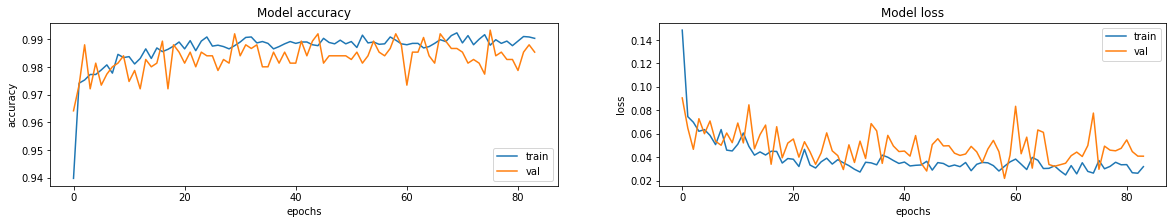

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = targetdir
model = load_model(model_path)

Found 757 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Accuracy  : 0.9828269484808454
Precision : 0.9829145008857315
f1Score : 0.9828278475730923
[[369   4]
 [  9 375]]


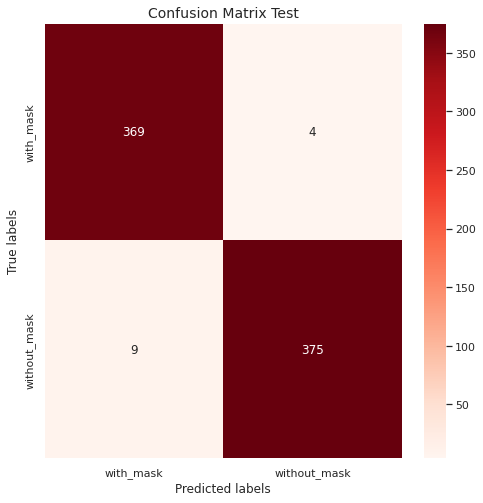

In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=224; width=224
batch_size=55

test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/dataset/test'

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= None,
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(8,8))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()

In [ ]:
import pandas as pd
#Dataframe capturing the accuracy and loss per epoch
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy,lr
0,0.148436,0.939755,0.090606,0.964191,1.000000e-02
1,0.074629,0.974181,0.064907,0.973475,8.912509e-03
2,0.069866,0.975339,0.046770,0.988064,7.943282e-03
3,0.062147,0.977325,0.072892,0.972149,7.079458e-03
4,0.063577,0.977325,0.060079,0.981432,6.309574e-03
...,...,...,...,...,...
79,0.033584,0.987752,0.047637,0.982759,1.122018e-06
80,0.033726,0.989407,0.054817,0.978780,1.000000e-06
81,0.026800,0.991063,0.044844,0.985411,8.912509e-07
82,0.026375,0.990897,0.040950,0.988064,7.943282e-07


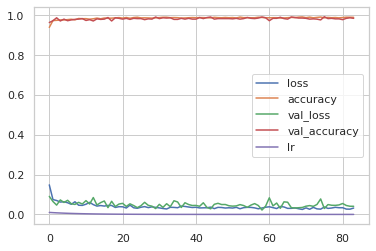

In [ ]:
history_df.plot();

#Model DenseNet169

In [ ]:
'''
Import Library yang dibutuhkan
'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten,Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
#optimizer
targetdir = '/content/gdrive/MyDrive/Tubes ML/Modul5Densnet169.h5'
savedir = targetdir
callbacks = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')        
best_model = ModelCheckpoint(savedir, monitor='val_accuracy', verbose = 1, save_best_only = True)

NameError: ignored

In [ ]:
import tensorflow as tf

# import pretrain model in this case i use Resnet Model and setting the parameter "include_top" to false so i can change it
DenseNet169_base = tf.keras.applications.densenet.DenseNet169(include_top=False, weights='imagenet',
                                                           input_tensor=None, input_shape=(224, 224,3))

51877672/51877672 [==============================] - 2s 0us/step


In [ ]:
'''
melakukan setting bahwa model pretrained tidak akan dilatih ulang
'''

DenseNet169_base.trainable = False

In [ ]:
print('Adding new layers')
output = DenseNet169_base.get_layer(index = -1).output  
output = Flatten()(output)
output = Dense(64,activation = "relu")(output)
output = Dense(128,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(1, activation='sigmoid')(output) 
print('New layers Finishing Added!!!!')

Adding new layers
New layers Finishing Added!!!!


In [ ]:
DenseNet169_model = Model(DenseNet169_base.input, output)


DenseNet169_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
from tensorflow.keras.optimizers import Adamax
import tensorflow as tf
# compile model
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# training & saving history of every epoch
history = DenseNet169_model.fit(datagen.flow(trainX, trainY, batch_size=32), epochs=100,
              validation_data=val_iterator,
              callbacks=[callbacks, best_model]
              )

Epoch 1/100
189/189 [==============================] - ETA: 0s - loss: 0.1210 - accuracy: 0.9525
Epoch 1: val_accuracy improved from -inf to 0.98276, saving model to /content/gdrive/MyDrive/Tubes ML/Modul5Densnet169.h5
189/189 [==============================] - 109s 479ms/step - loss: 0.1210 - accuracy: 0.9525 - val_loss: 0.0480 - val_accuracy: 0.9828
Epoch 2/100
189/189 [==============================] - ETA: 0s - loss: 0.0708 - accuracy: 0.9755
Epoch 2: val_accuracy did not improve from 0.98276
189/189 [==============================] - 82s 432ms/step - loss: 0.0708 - accuracy: 0.9755 - val_loss: 0.0569 - val_accuracy: 0.9801
Epoch 3/100
189/189 [==============================] - ETA: 0s - loss: 0.0587 - accuracy: 0.9800
Epoch 3: val_accuracy did not improve from 0.98276
189/189 [==============================] - 80s 422ms/step - loss: 0.0587 - accuracy: 0.9800 - val_loss: 0.0467 - val_accuracy: 0.9828
Epoch 4/100
189/189 [==============================] - ETA: 0s - loss: 0.0546 - ac

#Evaluasi Model 2 DenseNet169


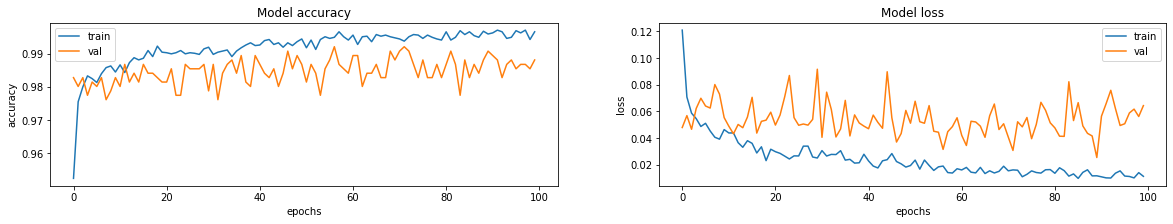

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = targetdir
model = load_model(model_path)

Found 757 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Accuracy  : 0.9735799207397622
Precision : 0.9746704094835357
f1Score : 0.9735741110888253
[[372   1]
 [ 19 365]]


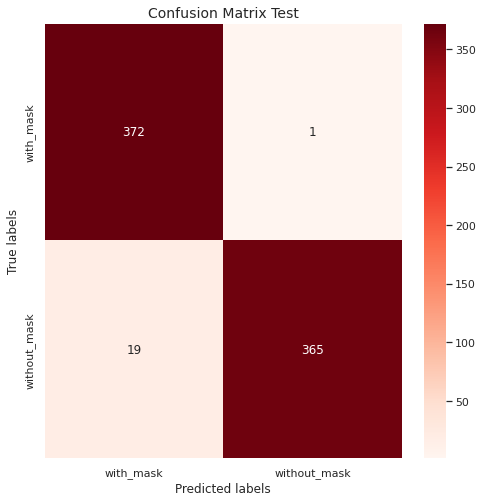

In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=224; width=224
batch_size=55

test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/dataset/test'

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= None,
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(8,8))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()

In [ ]:
import pandas as pd
#Dataframe capturing the accuracy and loss per epoch
history_df = pd.DataFrame(history.history)
history_df